# 19기 Time Series 정규세션 과제

### Electric_Production.csv 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
첨부한 '시계열자료_실습.ipynb' 코드를 참고하셔도 좋습니다.


### Box-Jenkins 방법론
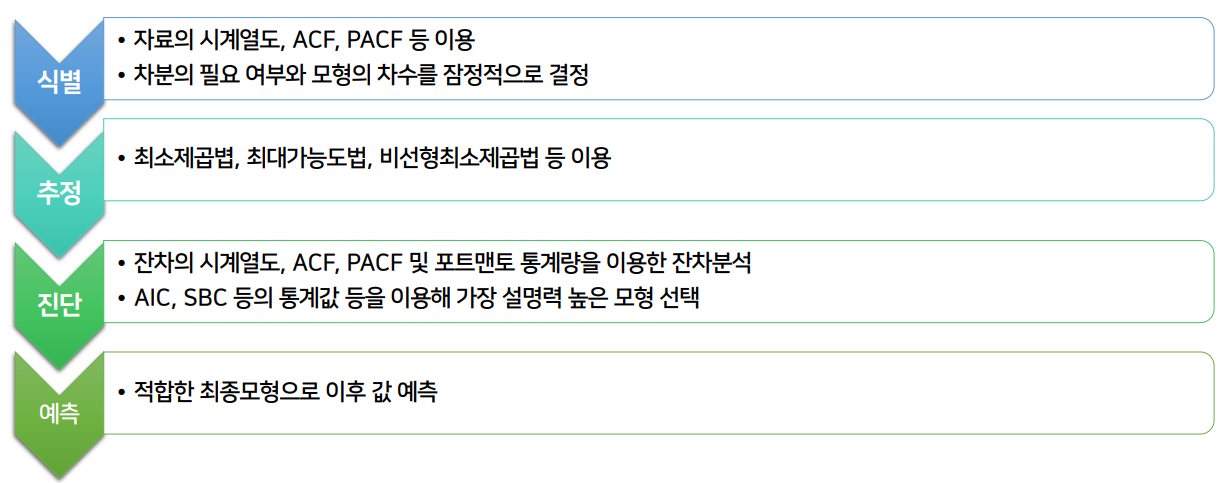

### Prophet
튜토리얼 : https://hyperconnect.github.io/2020/03/09/prophet-package.html

## 라이브러리 불러오기

In [102]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

## 데이터 불러오기

In [103]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df.head()

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0


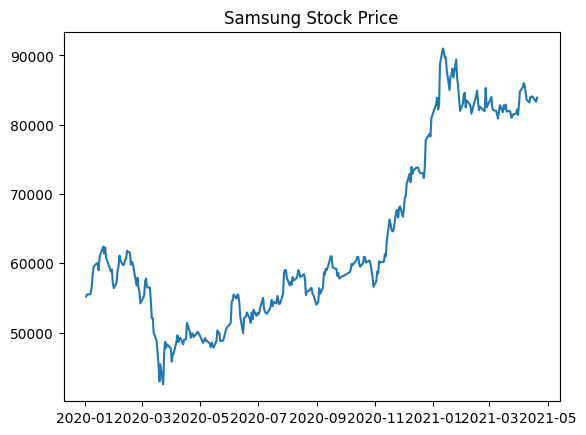

In [104]:
# 데이터 시각화
plt.plot(samsung_df)
plt.title('Samsung Stock Price')
plt.show()

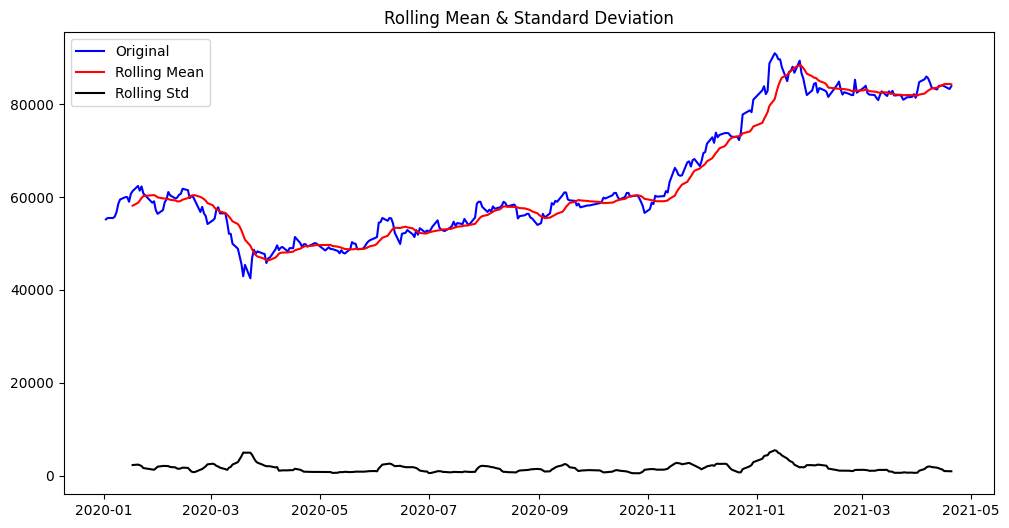

Test Statistic                  -0.212189
p-value                          0.937053
#Lags Used                       0.000000
Number of Observations Used    321.000000
Critical Value (1%)             -3.450887
Critical Value (5%)             -2.870586
Critical Value (10%)            -2.571590
dtype: float64


In [105]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    # rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Stationarity 검정
test_stationarity(samsung_df['price'])


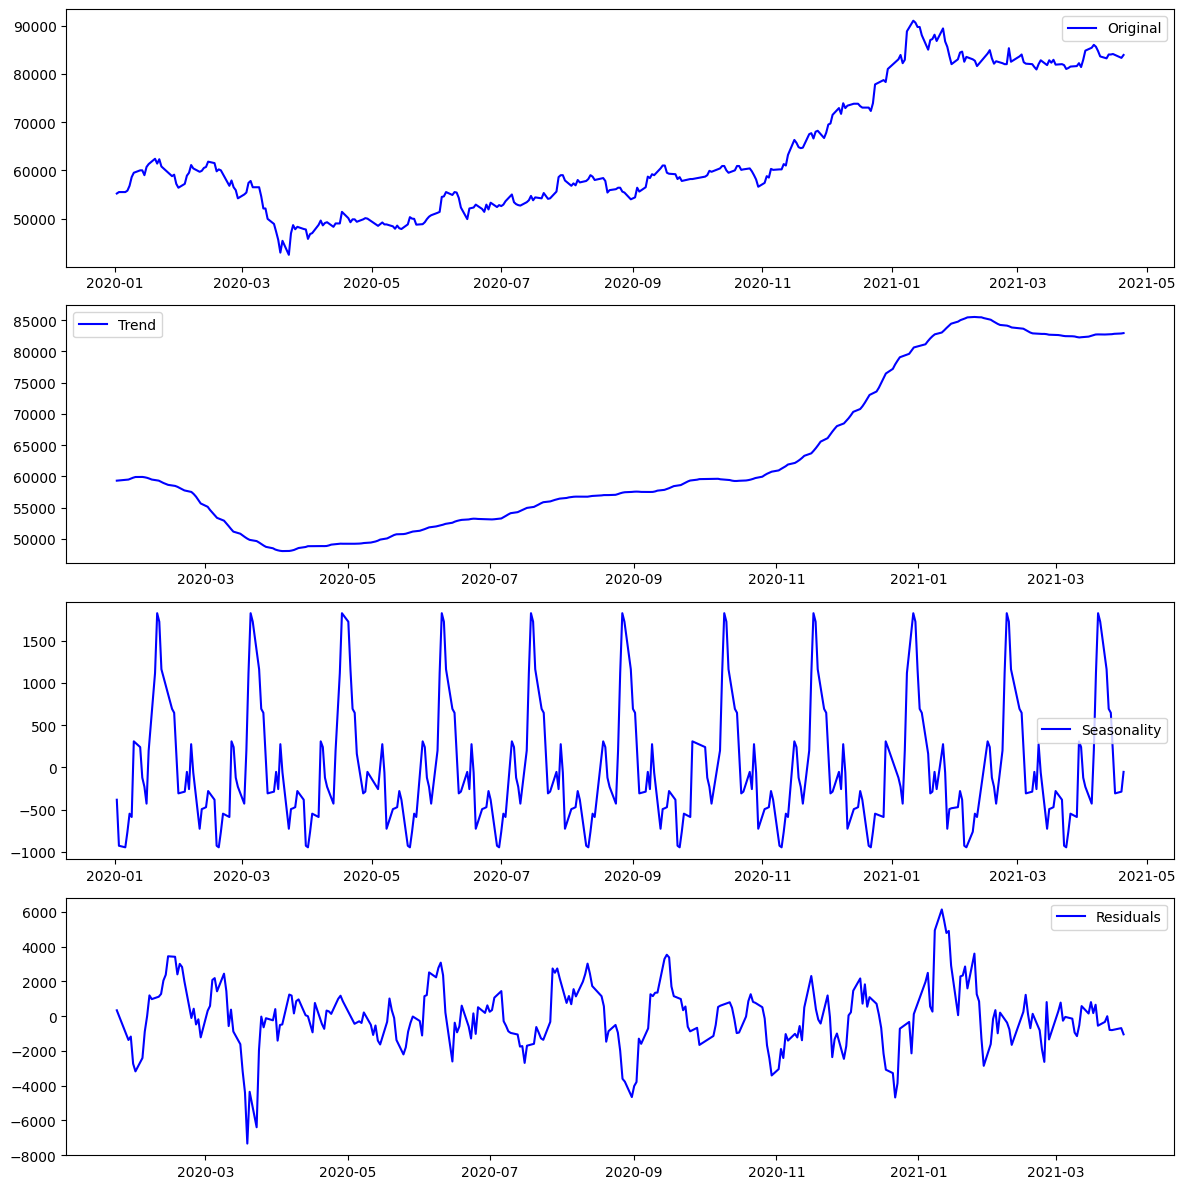

In [106]:
# 분해
decomposition = seasonal_decompose(samsung_df['price'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 시계열 분해 결과 시각화
plt.figure(figsize=(12, 12))
plt.subplot(411)
plt.plot(samsung_df['price'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


C:\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


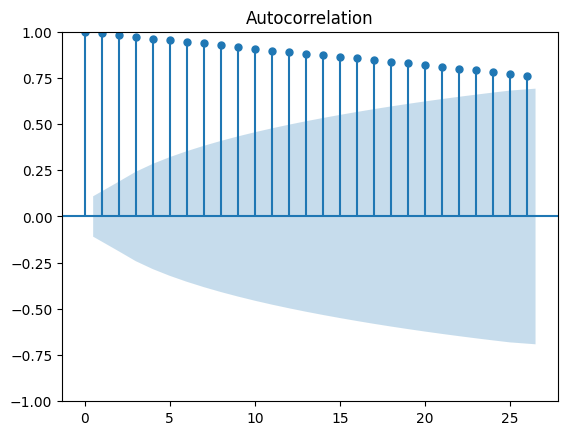

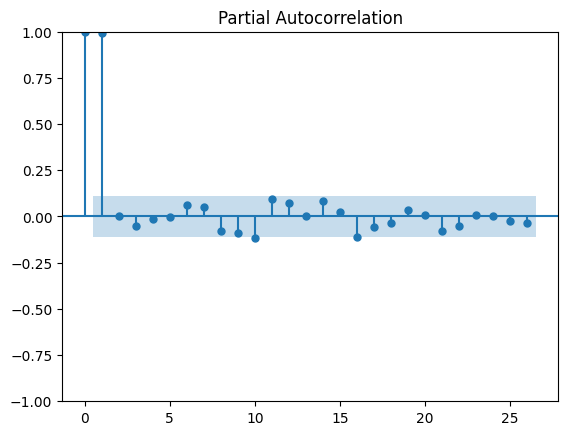

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF와 PACF 플로팅
plot_acf(samsung_df['price'])
plot_pacf(samsung_df['price'])
plt.show()

C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python39\lib\site-packages\statsmodels\

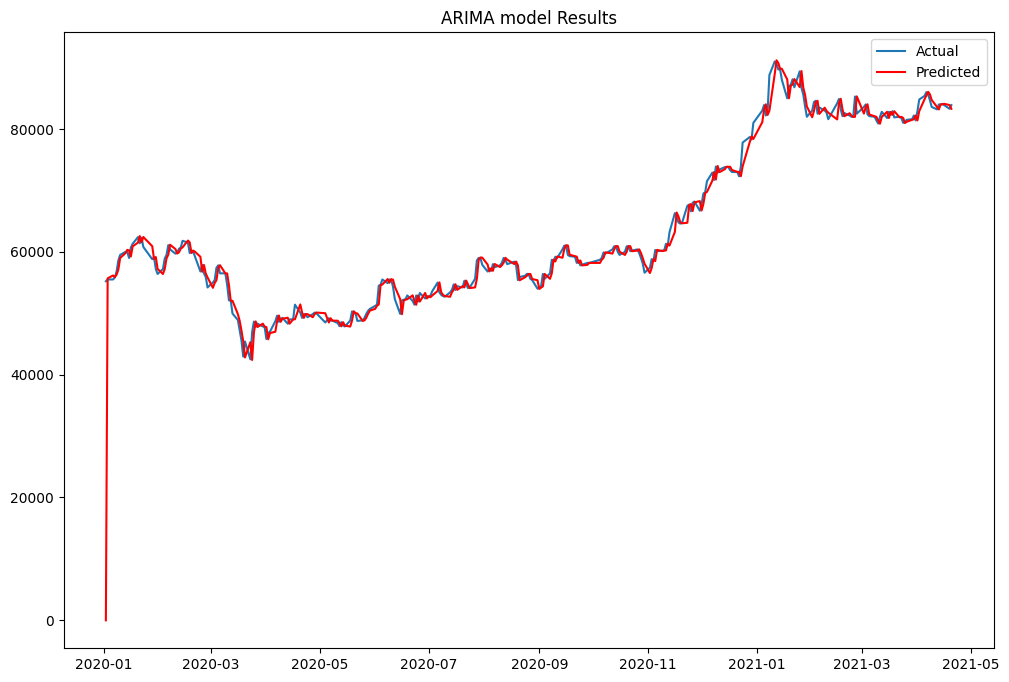

In [108]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA 모델 훈련
model = ARIMA(samsung_df['price'], order=(2, 1, 2))
results = model.fit()

# 예측 결과 시각화
plt.figure(figsize=(12, 8))
plt.plot(samsung_df['price'], label='Actual')
plt.plot(results.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.title('ARIMA model Results')
plt.show()

In [109]:
# 모델 평가
mse = ((results.fittedvalues - samsung_df['price']) ** 2).mean()
print('Mean Squared Error:', mse)


Mean Squared Error: 10949043.402995259
